In [98]:
import yfinance as yf
import pandas as pd
import requests

tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA", "NVDA", "META"]

price_data = {}
for ticker in tickers:
    data = yf.Ticker(ticker).history(period="1y").reset_index()
    data['20d_MA'] = data['Close'].rolling(window=20).mean()
    price_data[ticker] = data

api_key = 'nLztchNaNPvcGhuKkCp8oqiCN44dineu'
fmp_url = f"https://financialmodelingprep.com/api/v3/profile/{{}}?apikey={api_key}"
fundamentals = {}
for ticker in tickers:
    response = requests.get(fmp_url.format(ticker))
    if response.status_code == 200:
        fundamentals[ticker] = response.json()[0]
    else:
        fundamentals[ticker] = {}

fund_df = pd.DataFrame(fundamentals).T  
fund_df = fund_df[['symbol', 'price', 'companyName']]  
print(fund_df.head(7))

      symbol    price            companyName
AAPL    AAPL  211.252             Apple Inc.
MSFT    MSFT   454.27  Microsoft Corporation
AMZN    AMZN   205.59       Amazon.com, Inc.
GOOGL  GOOGL   166.19          Alphabet Inc.
TSLA    TSLA   349.98            Tesla, Inc.
NVDA    NVDA    135.4     NVIDIA Corporation
META    META   640.34   Meta Platforms, Inc.


C:\Users\Chris\AppData\Local\Temp\ipykernel_31860\1258909025.py:5: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



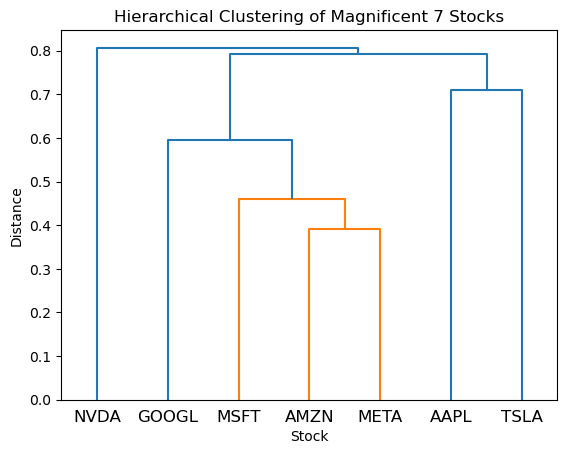

In [105]:

from scipy.cluster.hierarchy import dendrogram, linkage

# Compute distance (1 - correlation)
distances = 1 - corr_matrix
linkage_matrix = linkage(distances, method='ward')

# Dendrogram visualization
dendrogram(linkage_matrix, labels=distances.index)
plt.title("Hierarchical Clustering of Magnificent 7 Stocks")
plt.xlabel("Stock")
plt.ylabel("Distance")
plt.show()


In [38]:
#Grouping 
aapl_df['Month'] = aapl_df['Date'].dt.to_period('M')
monthly_avg = aapl_df.groupby('Month')['Close'].mean().reset_index()
print(monthly_avg)


      Month       Close
0   2024-05  189.597311
1   2024-06  205.303019
2   2024-07  223.553153
3   2024-08  220.783581
4   2024-09  222.974217
5   2024-10  229.250243
6   2024-11  227.200960
7   2024-12  248.722870
8   2025-01  234.022475
9   2025-02  238.134693
10  2025-03  222.411198
11  2025-04  200.920336
12  2025-05  205.437965


C:\Users\Chris\AppData\Local\Temp\ipykernel_31860\4040387800.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  aapl_df['Month'] = aapl_df['Date'].dt.to_period('M')


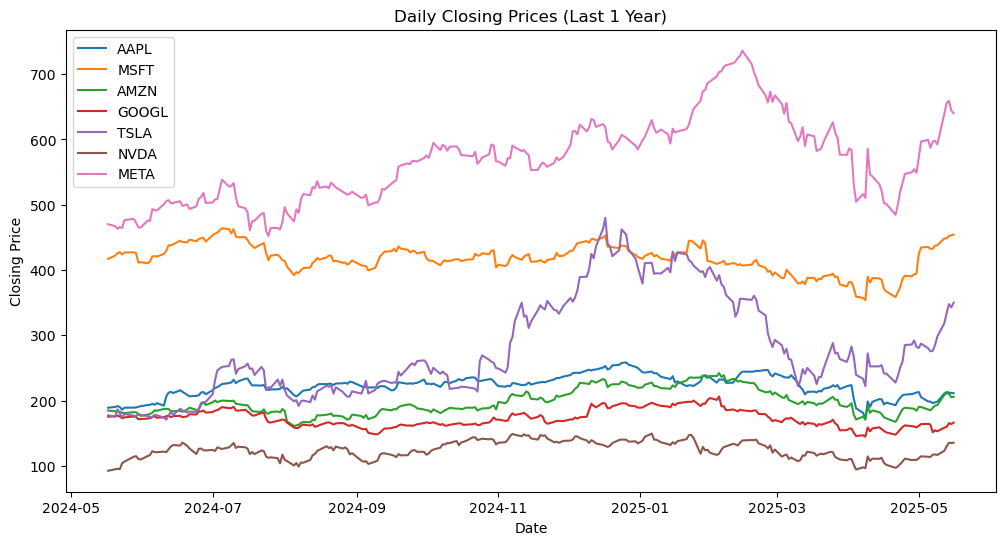

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for ticker, df in price_data.items():
    df['Date'] = pd.to_datetime(df['Date'])
    plt.plot(df['Date'], df['Close'], label=ticker)
plt.title("Daily Closing Prices (Last 1 Year)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


In [119]:
combined_close = pd.DataFrame()
for ticker, df in price_data.items():
    df['Date'] = pd.to_datetime(df['Date'])
    combined_close[ticker] = df.set_index('Date')['Close']
corr_matrix = combined_close.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
            AAPL      MSFT      AMZN     GOOGL      TSLA      NVDA      META
AAPL   1.000000  0.276413  0.648966  0.512358  0.667776  0.656732  0.586175
MSFT   0.276413  1.000000  0.299306  0.532087  0.207371  0.489758 -0.028984
AMZN   0.648966  0.299306  1.000000  0.771524  0.885952  0.599656  0.805121
GOOGL  0.512358  0.532087  0.771524  1.000000  0.621336  0.533565  0.389647
TSLA   0.667776  0.207371  0.885952  0.621336  1.000000  0.556100  0.717317
NVDA   0.656732  0.489758  0.599656  0.533565  0.556100  1.000000  0.470948
META   0.586175 -0.028984  0.805121  0.389647  0.717317  0.470948  1.000000


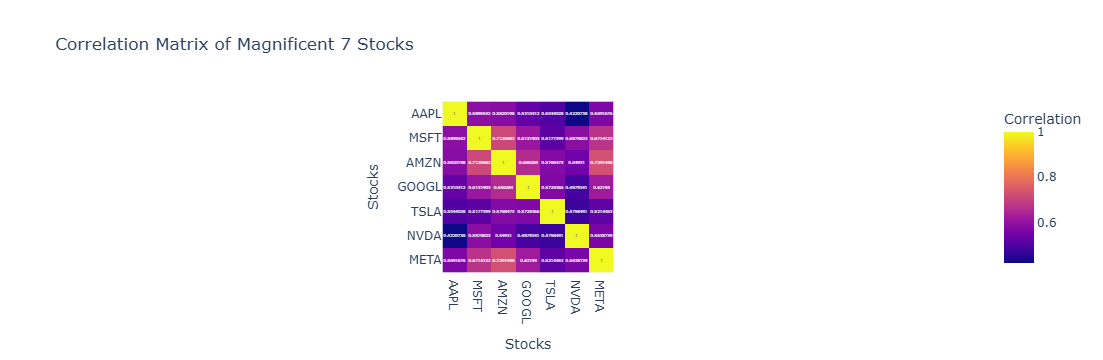

In [86]:
#Different feature than class
import plotly.express as px

fig = px.imshow(corr_matrix, 
                text_auto=True, 
                title="Correlation Matrix of Magnificent 7 Stocks",
                labels=dict(x="Stocks", y="Stocks", color="Correlation"))
fig.show()


Correlation Matrix:
           AAPL      MSFT      AMZN     GOOGL      TSLA      NVDA      META
AAPL   1.000000  0.589554  0.582020  0.531041  0.504403  0.422074  0.569168
MSFT   0.589554  1.000000  0.712058  0.613190  0.517740  0.587582  0.671412
AMZN   0.582020  0.712058  1.000000  0.656284  0.576847  0.549310  0.729145
GOOGL  0.531041  0.613190  0.656284  1.000000  0.572537  0.487934  0.621940
TSLA   0.504403  0.517740  0.576847  0.572537  1.000000  0.475849  0.521446
NVDA   0.422074  0.587582  0.549310  0.487934  0.475849  1.000000  0.563874
META   0.569168  0.671412  0.729145  0.621940  0.521446  0.563874  1.000000


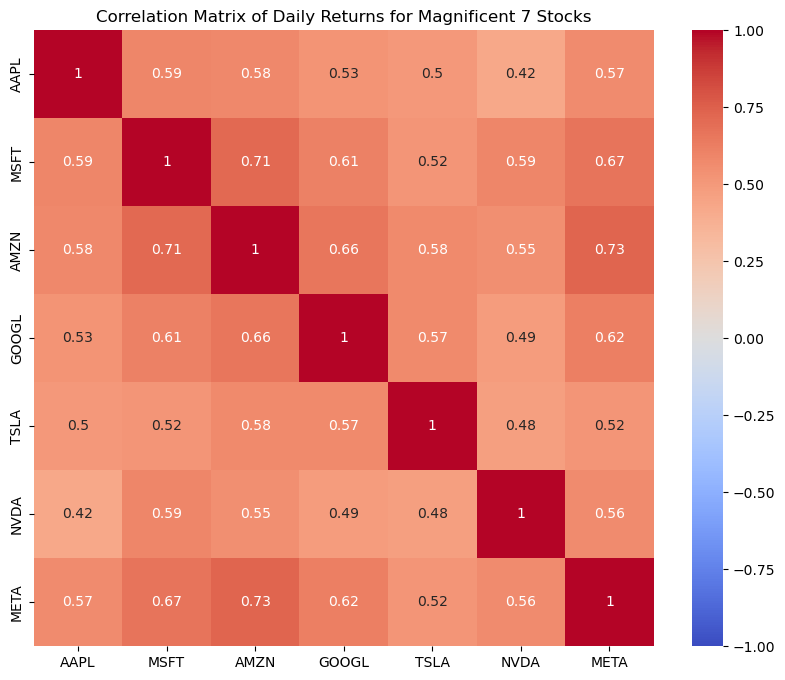

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_close = pd.DataFrame()
for ticker, df in price_data.items():
    df['Date'] = pd.to_datetime(df['Date'])
    combined_close[ticker] = df.set_index('Date')['Close']

returns = combined_close.pct_change().dropna()


corr_matrix = returns.corr()
print("Correlation Matrix:")
print(corr_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Daily Returns for Magnificent 7 Stocks")
plt.show()


      symbol    price            companyName
AAPL    AAPL  211.252             Apple Inc.
MSFT    MSFT   454.27  Microsoft Corporation
AMZN    AMZN   205.59       Amazon.com, Inc.
GOOGL  GOOGL   166.19          Alphabet Inc.
TSLA    TSLA   349.98            Tesla, Inc.


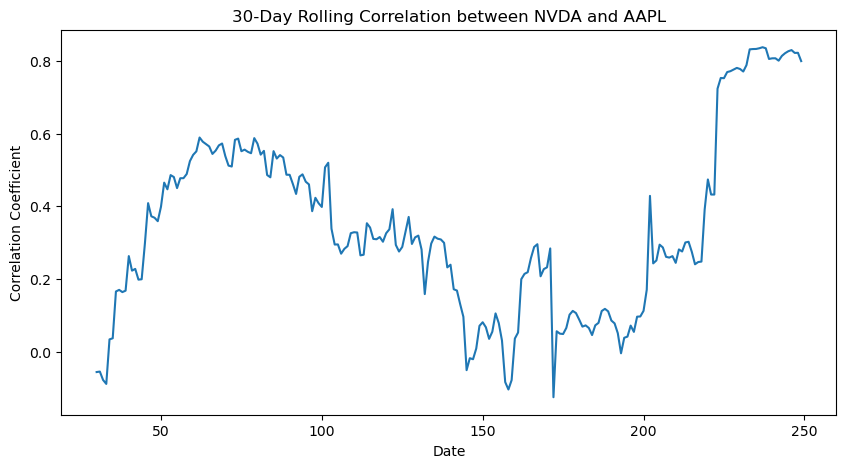

In [113]:

rolling_corr = returns['NVDA'].rolling(window=30).corr(returns['AAPL'])

plt.figure(figsize=(10, 5))
plt.plot(rolling_corr)
plt.title("30-Day Rolling Correlation between NVDA and AAPL")
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.show()


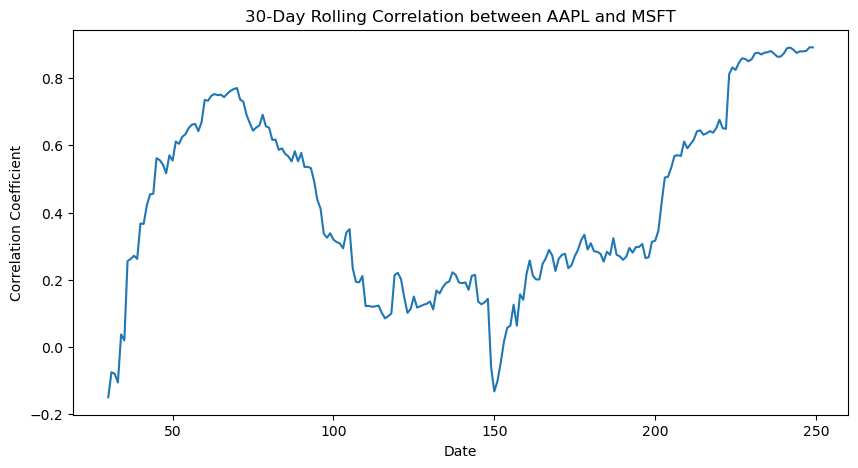

In [111]:
rolling_corr = returns['NVDA'].rolling(window=30).corr(returns['TSLA'])

plt.figure(figsize=(10, 5))
plt.plot(rolling_corr)
plt.title("30-Day Rolling Correlation between NVDA and TSLA")
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.show()

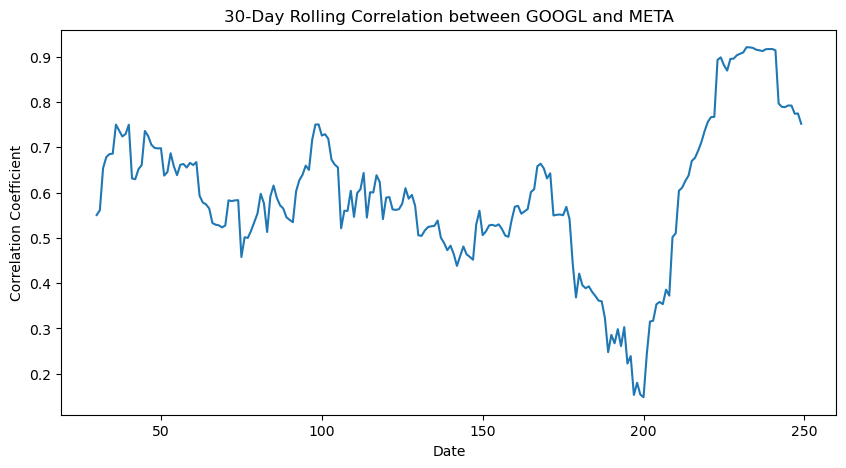

In [115]:
rolling_corr = returns['GOOGL'].rolling(window=30).corr(returns['META'])

plt.figure(figsize=(10, 5))
plt.plot(rolling_corr)
plt.title("30-Day Rolling Correlation between GOOGL and META")
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.show()

Explained Variance Ratio by PCA Components:
[0.64492879 0.16097227]


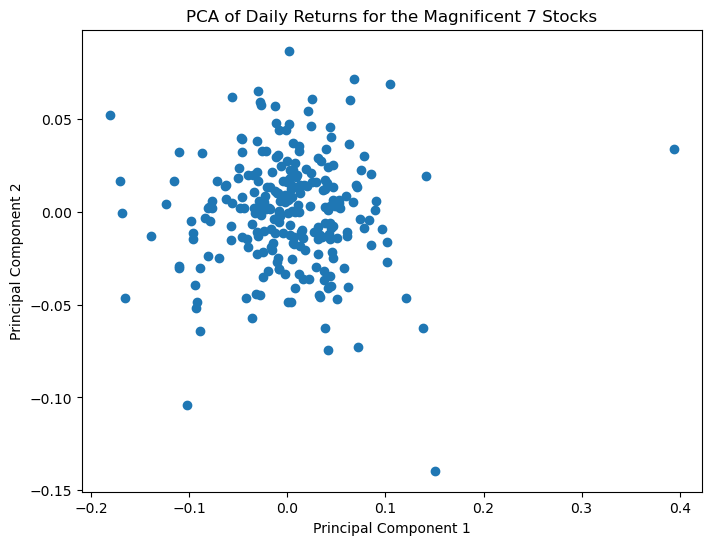

In [121]:
from sklearn.decomposition import PCA

# Perform PCA on the returns data
pca = PCA(n_components=2)
pca_results = pca.fit_transform(returns)

print("Explained Variance Ratio by PCA Components:")
print(pca.explained_variance_ratio_)

# Optionally, visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.title("PCA of Daily Returns for the Magnificent 7 Stocks")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
